In [1]:
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import io
import os
import re
import numpy as np
import pandas as pd
import skimage as ski
from skimage import data
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.transform import resize
from skimage.filters import threshold_otsu
import cv2
import multiprocessing 
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

Getting the pictures with and without artifact and converting them into greyscale:

In [2]:
picture_with_rfi = []
picture_without_rfi = [] #picture without RFI artifacts

pool = multiprocessing.Pool()

for i in os.listdir("D:/CSU/DSCI478/artifact/"):
    file_path = os.path.join("D:/CSU/DSCI478/artifact/", i)
    img = cv2.imread(file_path, 0)
    picture_with_rfi.append(img)
for i in os.listdir("D:/CSU/DSCI478/no_artifact//"):
    file_path = os.path.join("D:/CSU/DSCI478/no_artifact/", i)
    img = cv2.imread(file_path, 0)
    picture_without_rfi.append(img)

pool.close()

Showing examples of the pictures.

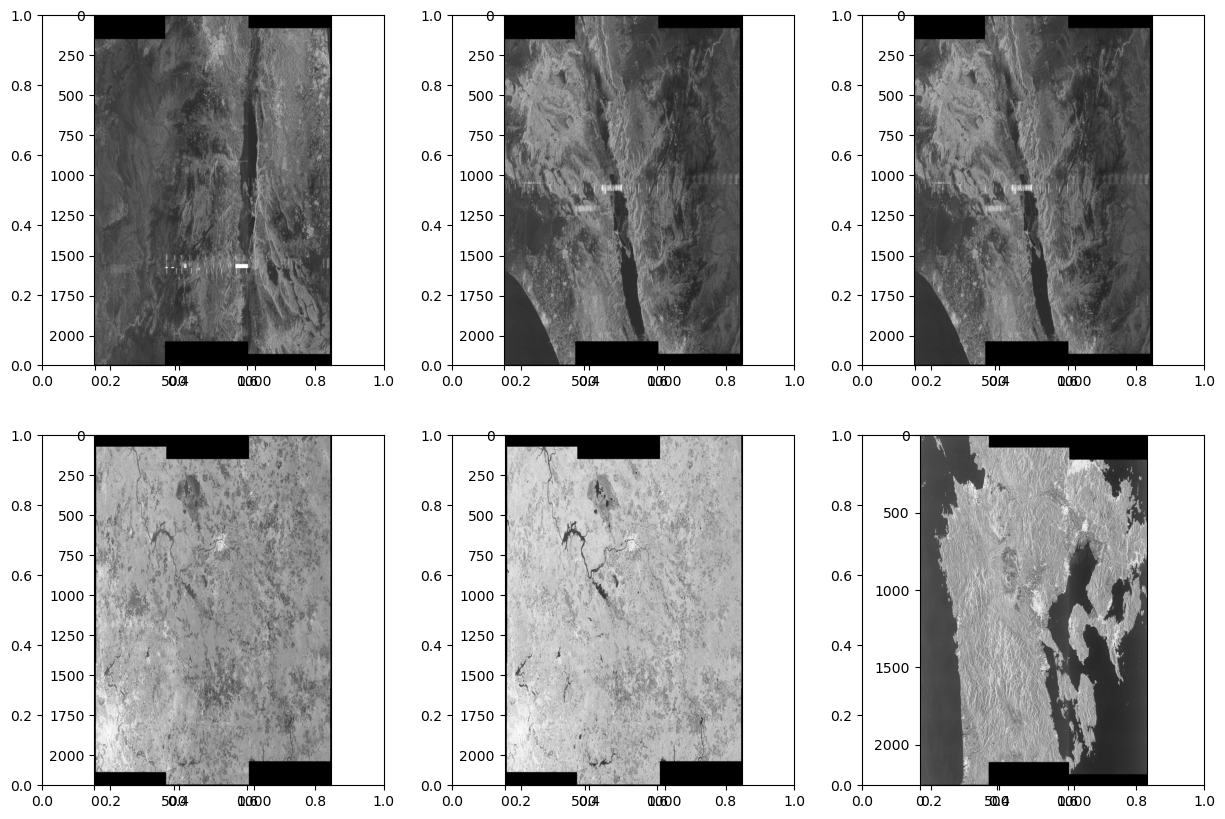

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(picture_with_rfi):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(picture_without_rfi):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

I chose 195 as a threshold after multiple experiments.

In [4]:
thresholded_with_rfi = []
thresholded_without_rfi = []
for img in picture_with_rfi:
    ret, thresh = cv2.threshold(img,195, 255,cv2.THRESH_BINARY)
    thresholded_with_rfi.append(thresh)

for img in picture_without_rfi:
    ret, thresh = cv2.threshold(img,195, 255,cv2.THRESH_BINARY)
    thresholded_without_rfi.append(thresh)

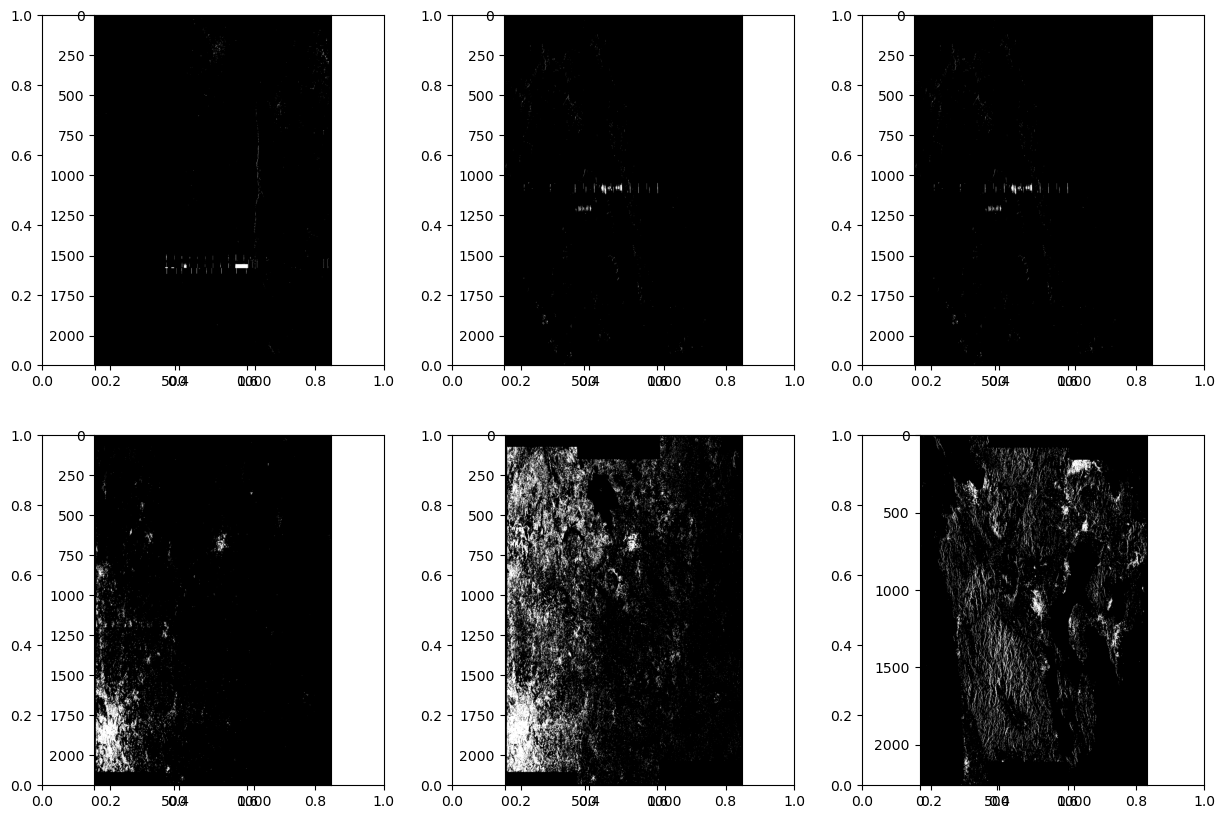

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(thresholded_with_rfi):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(thresholded_without_rfi):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

Now I will try to use the filters that were used on the paper that this project was built on.

In [6]:
sob_kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])
emb_kernel = np.array([[1, 0, 0],
                   [0, 0, 0],
                   [0, 0, -1]])
gus_kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])
lap_kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [7]:
Sobel_with_RFI = []
Sobel_without_RFI = []
for img in thresholded_with_rfi:
    # Apply the Sobel kernel to the image
    Sobel_with_RFI.append(cv2.filter2D(img, -1, sob_kernel))

for img in thresholded_without_rfi:
    # Apply the Sobel kernel to the image
    Sobel_without_RFI.append(cv2.filter2D(img, -1, sob_kernel))


emb_with_RFI = []
emb_without_RFI = []
for img in thresholded_with_rfi:
    # Apply the emboss kernel to the image
    emb_with_RFI.append(cv2.filter2D(img, -1, emb_kernel))

for img in thresholded_without_rfi:
    # Apply the emboss kernel to the image
    emb_without_RFI.append(cv2.filter2D(img, -1, emb_kernel))

gus_with_RFI = []
gus_without_RFI = []
for img in thresholded_with_rfi:
    # Apply the gaussian kernel to the image
    gus_with_RFI.append(cv2.filter2D(img, -1, gus_kernel))

for img in thresholded_without_rfi:
    # Apply the gaussian kernel to the image
    gus_without_RFI.append(cv2.filter2D(img, -1, gus_kernel))

lap_with_RFI = []
lap_without_RFI = []
for img in thresholded_with_rfi:
    # Apply the laplace kernel to the image
    lap_with_RFI.append(cv2.filter2D(img, -1, lap_kernel))

for img in thresholded_without_rfi:
    # Apply the laplace kernel to the image
    lap_without_RFI.append(cv2.filter2D(img, -1, lap_kernel))

Showing the pictures after applying the Sobel Gradient Sharpening Filter.

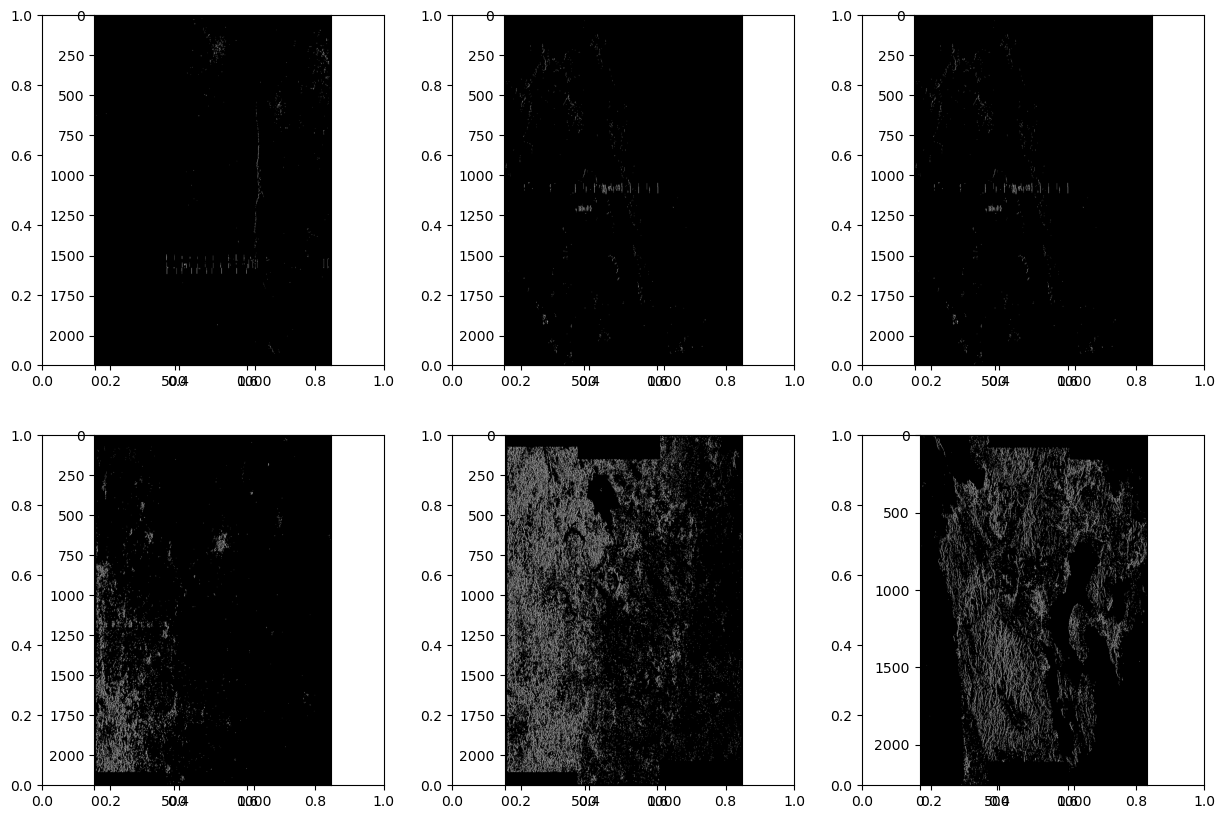

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(Sobel_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(Sobel_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

Showing the pictures after applying Emboss Mask.

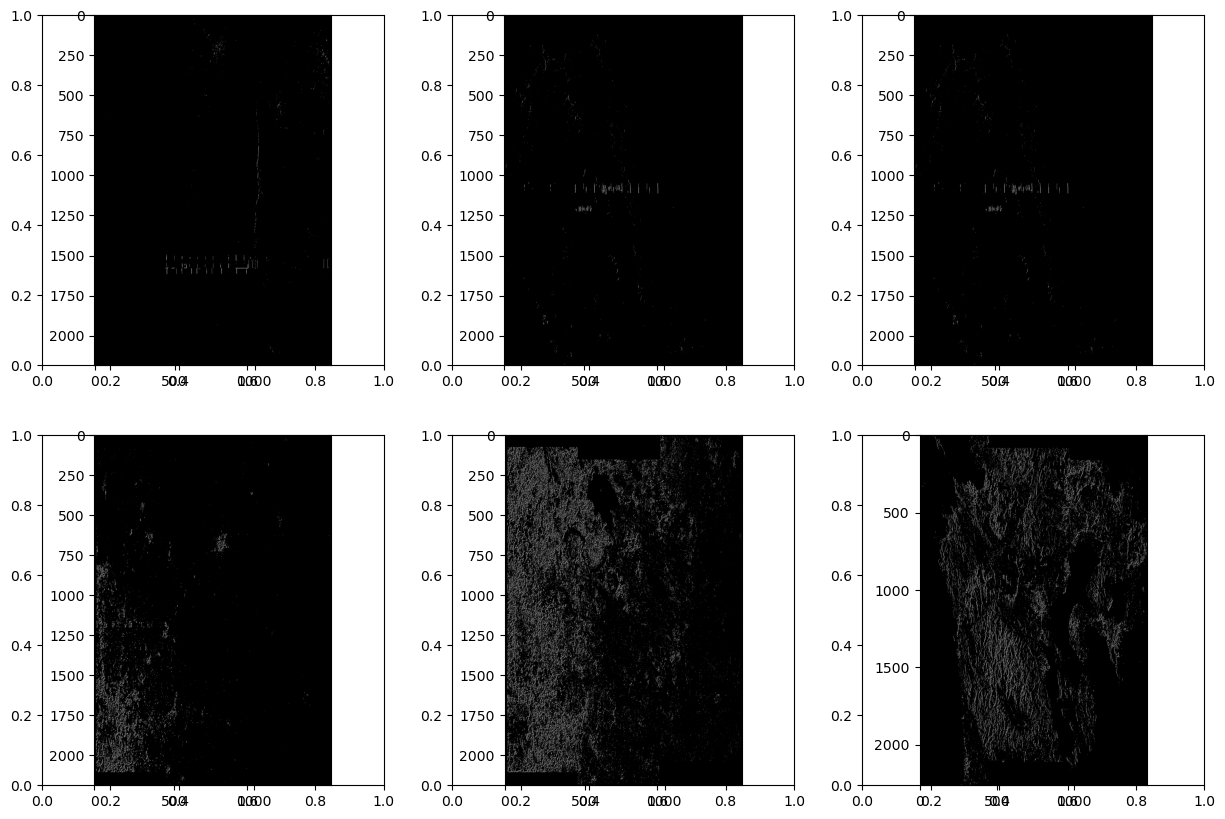

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(emb_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(emb_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

Showing the pictures after applying the Gaussian Blur Mask.

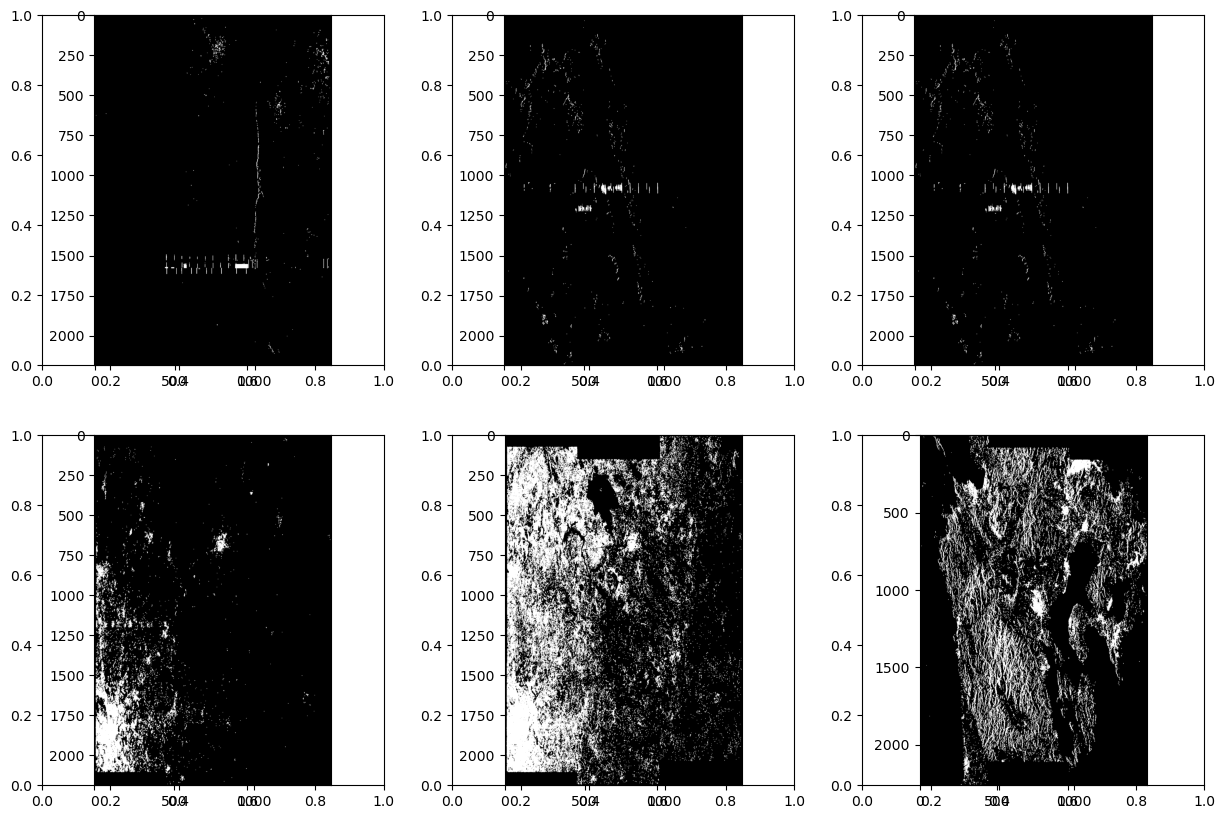

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(gus_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(gus_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

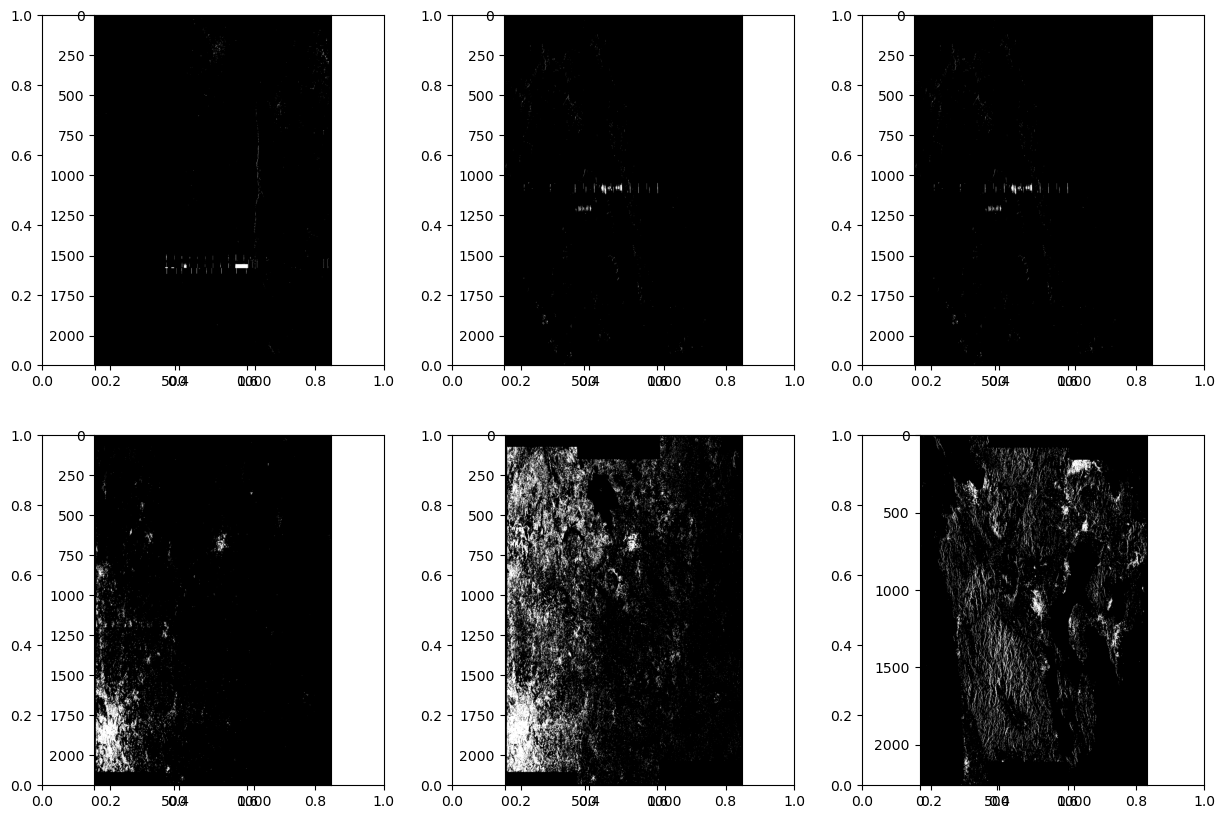

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(lap_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(lap_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

other filters

In [12]:
erode_with_RFI = []
erode_without_RFI = []
kernal = np.ones((3,3))
for img in thresholded_with_rfi:
    erode_with_RFI.append(cv2.erode(img, kernal, iterations = 1))
for img in thresholded_without_rfi:
    erode_without_RFI.append(cv2.erode(img, kernal, iterations = 1))

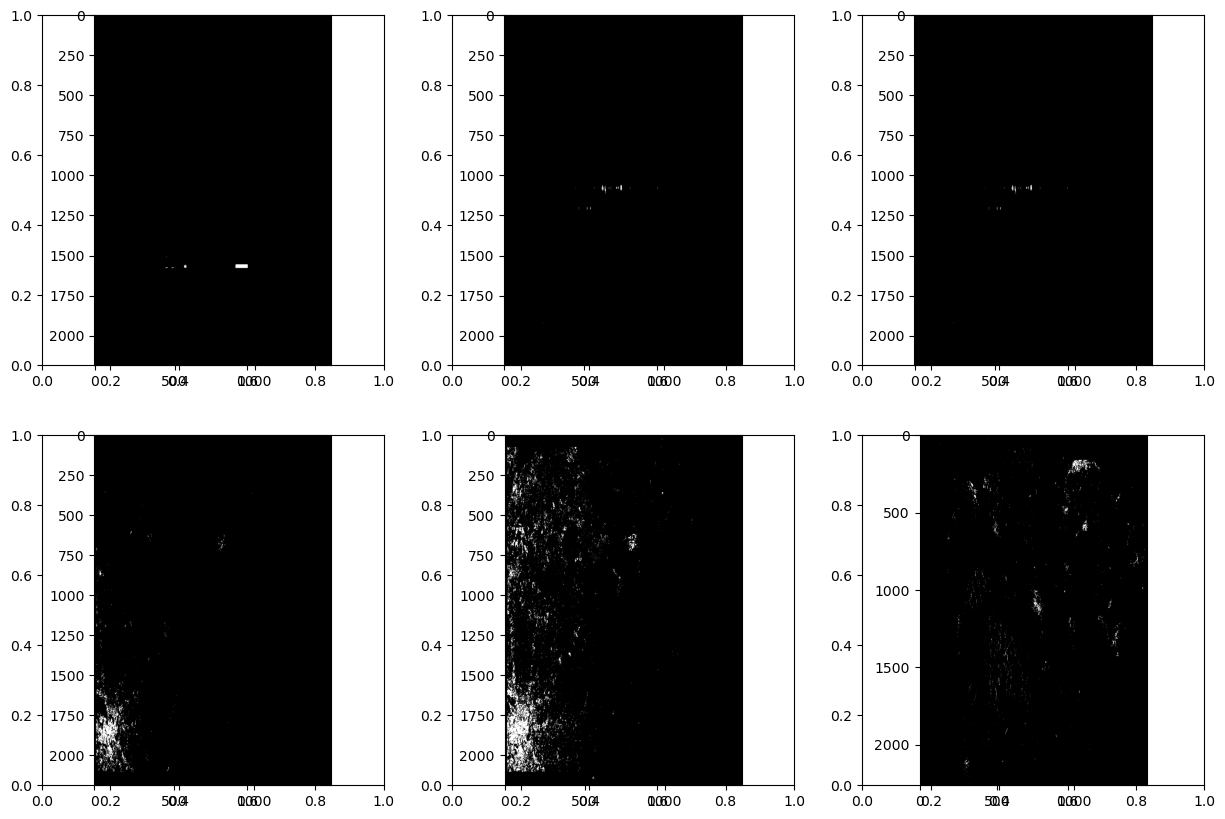

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(erode_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(erode_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

In [14]:
median_with_RFI = []
median_without_RFI = []
for img in thresholded_with_rfi:
    median_with_RFI.append(cv2.medianBlur(img, 5))

for img in thresholded_without_rfi:
    median_without_RFI.append(cv2.medianBlur(img, 5))

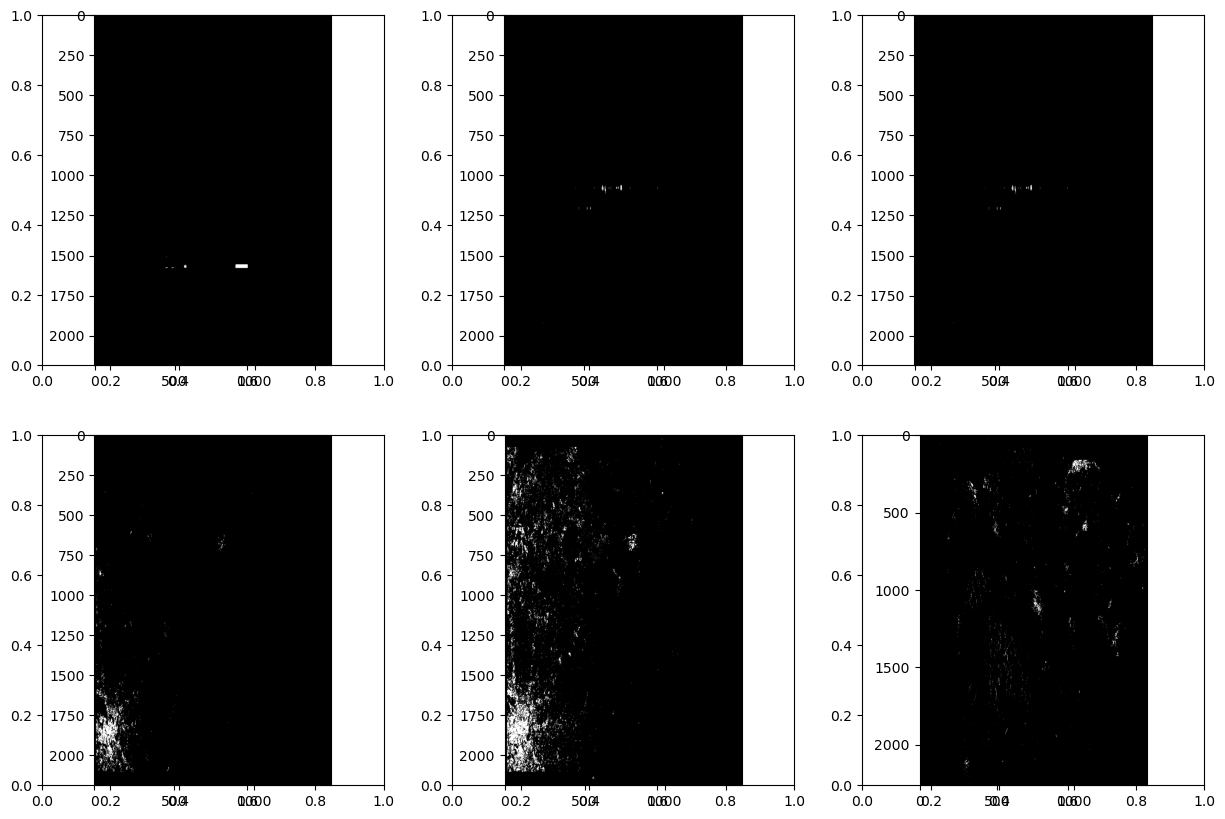

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(erode_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(erode_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

In [16]:
bilateral_with_RFI = []
bilateral_without_RFI = []
for img in thresholded_with_rfi:
    bilateral_with_RFI.append(cv2.bilateralFilter(img, 5,10,10))
for img in thresholded_without_rfi:
    bilateral_without_RFI.append(cv2.bilateralFilter(img, 5,10,10))

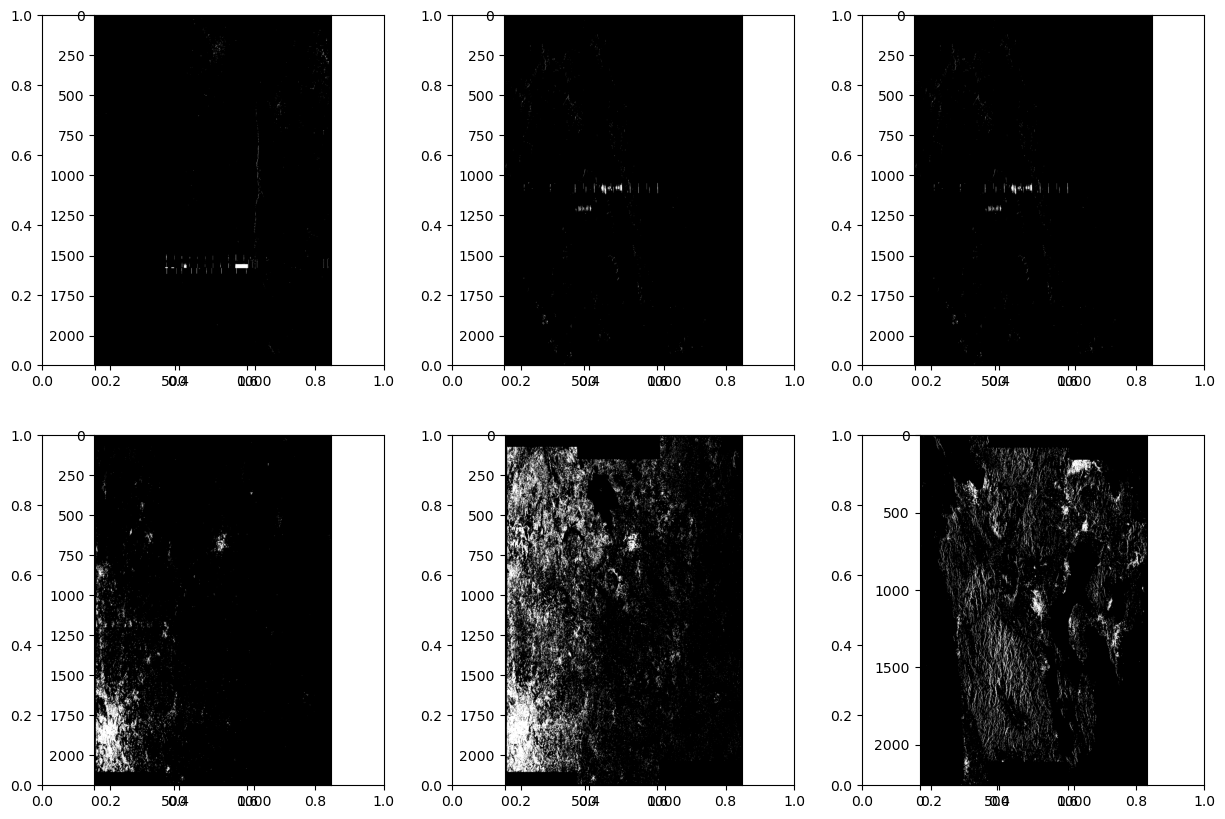

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(bilateral_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
for i, image in enumerate(bilateral_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

In [18]:
Canny_with_RFI = []
Canny_without_RFI = []
for img in thresholded_with_rfi:
    Canny_with_RFI.append(cv2.Canny(img, 100, 200))
for img in thresholded_without_rfi:
    Canny_without_RFI.append(cv2.Canny(img, 100, 200))

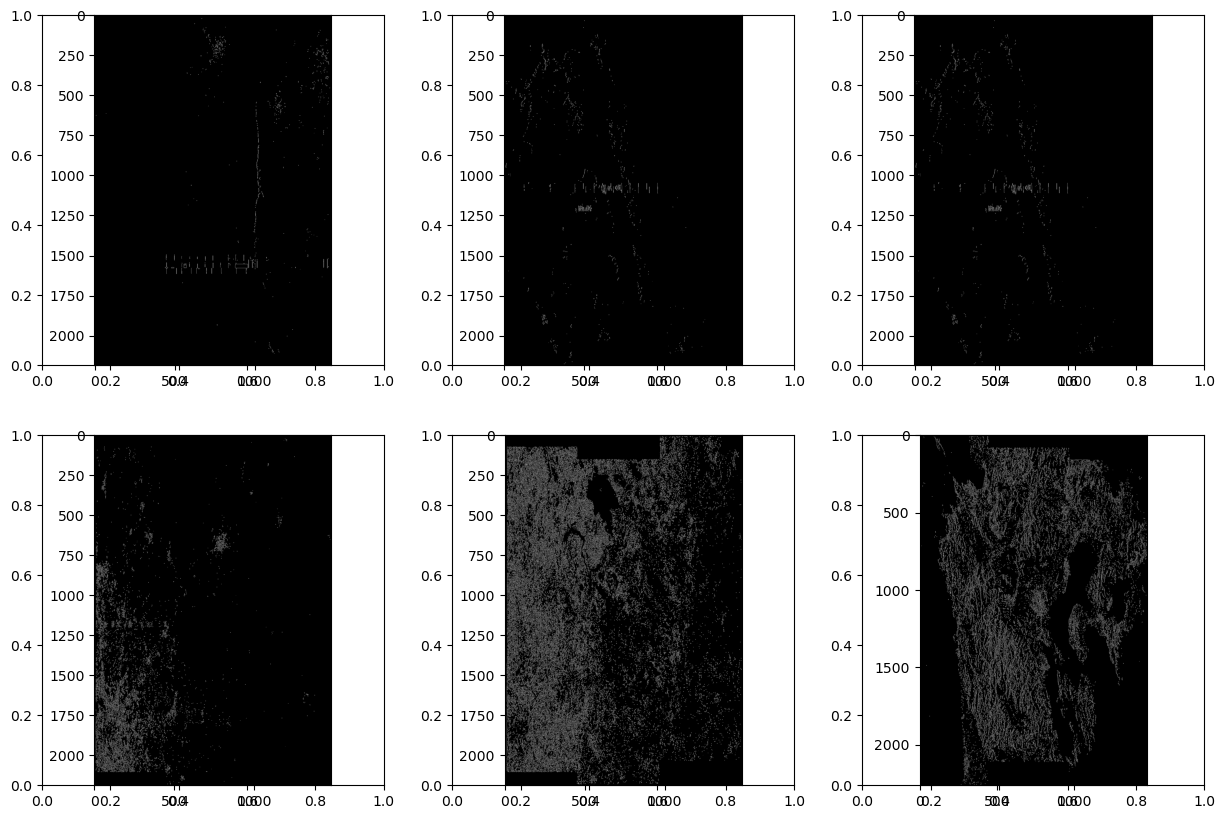

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(Canny_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
for i, image in enumerate(Canny_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

The idea behind this is to choose really big threshold, so just the very white pixels will be chosen, and set the kernel size of the average filtering very big, so it would be clear in the picture that there is an artifact, and the CNN could detect it. 

In [20]:
thresholded_with_rfi2 = []
thresholded_without_rfi2 = []
for img in picture_with_rfi:
    ret, thresh = cv2.threshold(img,233, 255,cv2.THRESH_BINARY)
    thresholded_with_rfi2.append(thresh)

for img in picture_without_rfi:
    ret, thresh = cv2.threshold(img,233, 255,cv2.THRESH_BINARY)
    thresholded_without_rfi2.append(thresh)

In [21]:
avg_with_RFI = []
avg_without_RFI = []
for img in thresholded_with_rfi:
    avg_with_RFI.append(cv2.blur(img, (150,150)))

for img in thresholded_without_rfi:
    avg_without_RFI.append(cv2.blur(img, (150,150)))

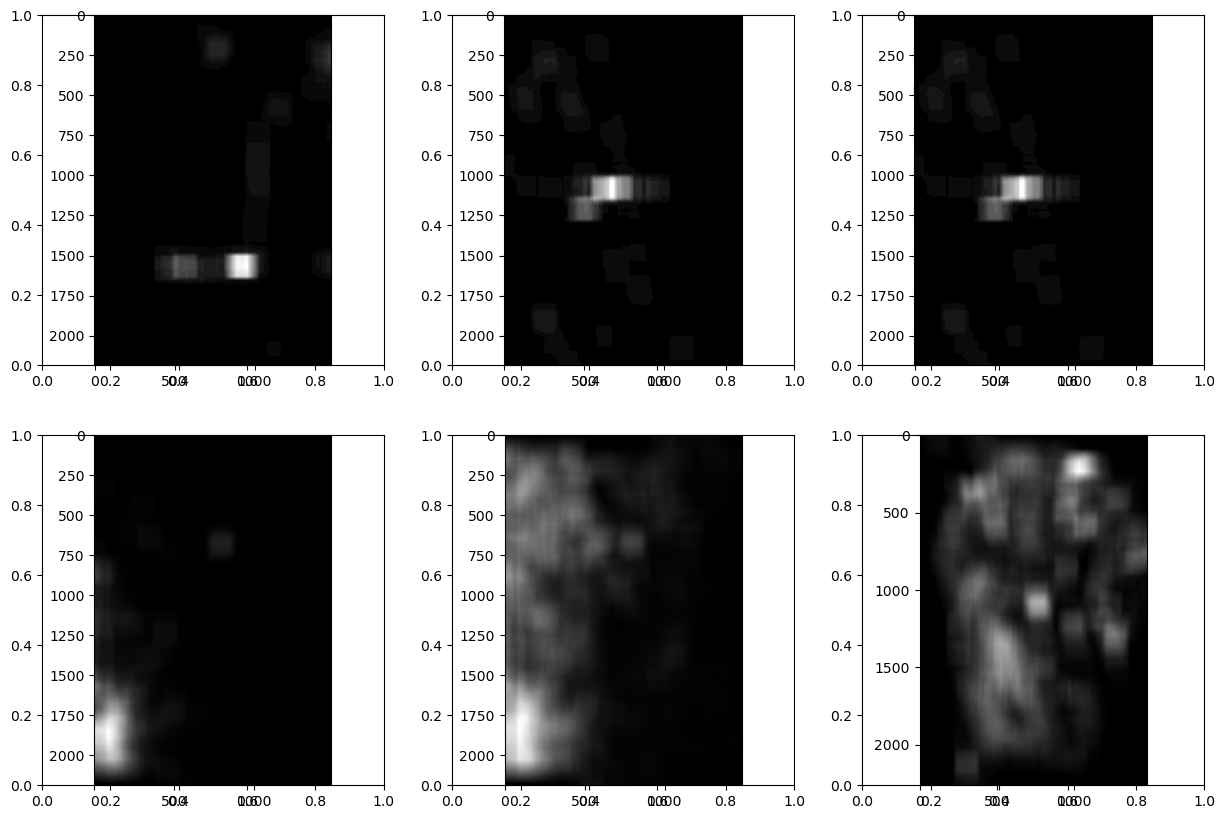

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(avg_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(avg_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

In [23]:
dia_with_RFI = []
dia_without_RFI = []
kernal = np.ones((3,3))
for img in erode_with_RFI:
    dia_with_RFI.append(cv2.dilate(img, kernal, iterations = 1))
for img in erode_without_RFI:
    dia_without_RFI.append(cv2.dilate(img, kernal, iterations = 1))

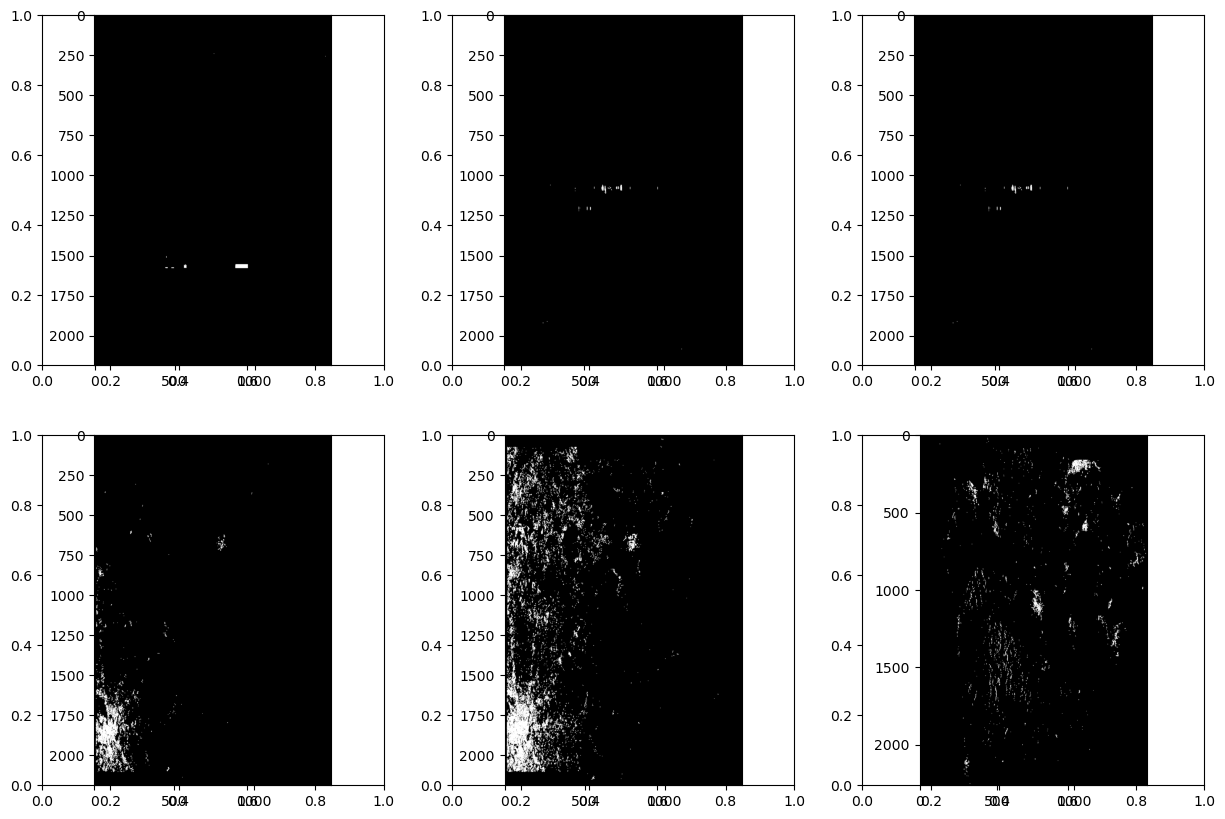

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i, image in enumerate(dia_with_RFI):
    fig.add_subplot(2,3,i+1)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break

for i, image in enumerate(dia_without_RFI):
    fig.add_subplot(2,3,i+4)
    plt.imshow(image, cmap = 'gray')
    if i == 2:
        break
plt.show()

Now I will build a deep conventional neural network classifier using tensorflow, as it is the most popular tool for building Neural Networks.

In [25]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

In [26]:
label1 = [1 for i in range(len(avg_with_RFI))] # 1 for artifact
label2 = [0 for i in range(len(avg_without_RFI))] # 0 for no artifact

images = [cv2.resize(image, (256,256)) for image in avg_with_RFI]

avg_w_RFI_dataset = tf.data.Dataset.from_tensor_slices((images, label1))

images2 = [cv2.resize(image, (256,256)) for image in avg_without_RFI]

avg_wout_RFI_dataset = tf.data.Dataset.from_tensor_slices((images2,label2))

In [27]:
tf_avg = avg_w_RFI_dataset.concatenate(avg_wout_RFI_dataset)

In [28]:
tf_avg = tf_avg.cache()
tf_avg = tf_avg.shuffle(165)
tf_avg = tf_avg.batch(16)
tf_avg = tf_avg.prefetch(64)

In [29]:
itr = tf_avg.as_numpy_iterator()

In [30]:
batch = itr.next()

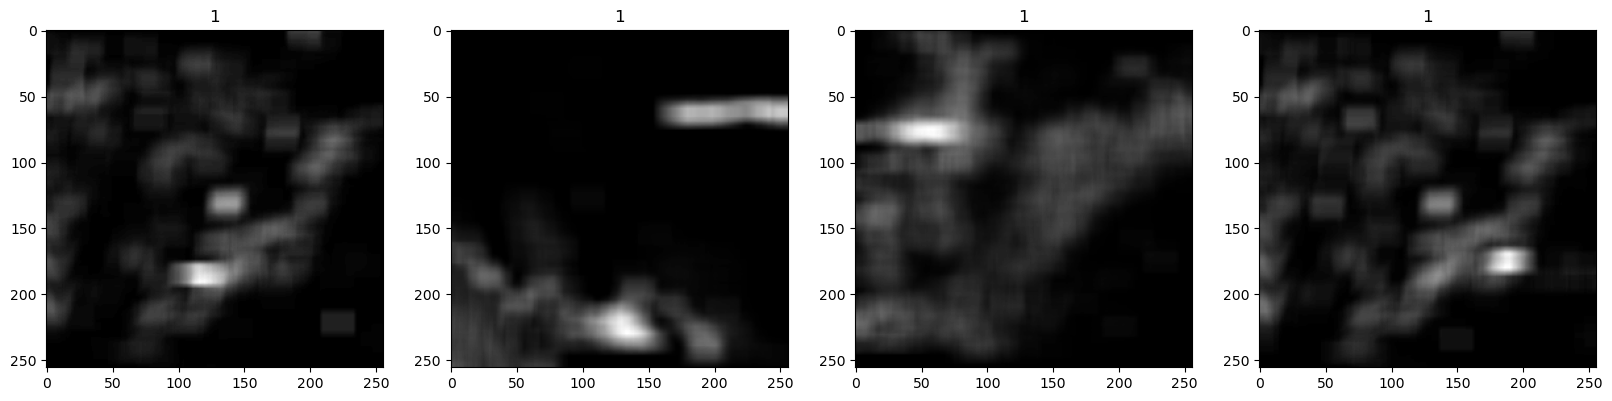

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int), cmap = 'grey')
    ax[idx].title.set_text(batch[1][idx])

In [32]:
tf_avg = tf_avg.map(lambda x,y: (x/255, y))

In [33]:
batch = tf_avg.as_numpy_iterator().next()

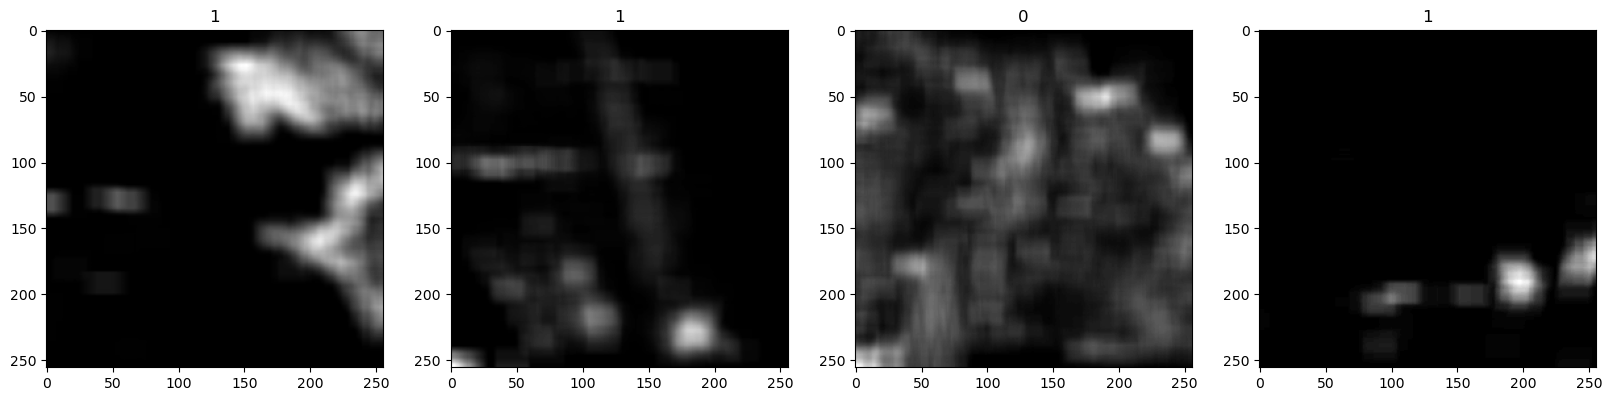

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img, cmap = 'grey')
    ax[idx].title.set_text(batch[1][idx])

In [35]:
len(tf_avg)

22

I want to use 50%, 25%, 25% split.

In [36]:
train_size = 11
val_size = 6
test_size = 5

In [37]:
train = tf_avg.take(train_size)
val = tf_avg.skip(train_size).take(val_size)
test = tf_avg.skip(train_size+val_size).take(test_size)

In [38]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [39]:
def CNN():
    model = tf.keras.models.Sequential()
    
    # First conventional Layer
    model.add(Conv2D(32,(3,3), 1, activation = 'relu', input_shape=(256,256, 1)))
    model.add(MaxPooling2D((2,2)))

    # Second conventional Layer
    model.add(Conv2D(32, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())

    # Third conventional Layer
    model.add(Conv2D(16, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())


    
    model.add(Flatten())

    # A dense layer to reduce interdependence
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # sigmoid to know the probability of a picture having an artifact
    
    return model

In [40]:
model = CNN()
model.summary()

C:\Users\rashd\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,701,105 (14.12 MB)

 Trainable params: 3,701,105 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 530ms/step - accuracy: 0.6813 - loss: 0.7312 - val_accuracy: 0.7500 - val_loss: 0.6826
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 491ms/step - accuracy: 0.5057 - loss: 0.6944 - val_accuracy: 0.4896 - val_loss: 0.6897
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 448ms/step - accuracy: 0.6901 - loss: 0.6711 - val_accuracy: 0.6146 - val_loss: 0.6843
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 465ms/step - accuracy: 0.6020 - loss: 0.6598 - val_accuracy: 0.6458 - val_loss: 0.6189
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 442ms/step - accuracy: 0.6456 - loss: 0.6142 - val_accuracy: 0.5625 - val_loss: 0.6547
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 526ms/step - accuracy: 0.7772 - loss: 0.4998 - val_accuracy: 0.8333 - val_loss: 0.3750
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 450ms/step - accuracy: 0.6922 - loss: 0.5842 - val_accuracy: 0.6771 - val_loss: 0.5752
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 444ms/step - accuracy: 0.8203 - loss: 0.4366 - val_accuracy: 0

In [44]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


In [45]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(0.88461536, shape=(), dtype=float32) tf.Tensor(0.9583333, shape=(), dtype=float32) tf.Tensor(0.94871795, shape=(), dtype=float32)


In [46]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

In [47]:
label1 = [1 for i in range(len(gus_with_RFI))] # 1 for artifact
label2 = [0 for i in range(len(gus_without_RFI))] # 0 for no artifact

images = [cv2.resize(image, (256,256)) for image in gus_with_RFI]

gus_w_RFI_dataset = tf.data.Dataset.from_tensor_slices((images, label1))

images2 = [cv2.resize(image, (256,256)) for image in gus_without_RFI]

gus_wout_RFI_dataset = tf.data.Dataset.from_tensor_slices((images2,label2))

In [48]:
tf_gus = gus_w_RFI_dataset.concatenate(gus_wout_RFI_dataset)

In [49]:
tf_gus = tf_gus.cache()
tf_gus = tf_gus.shuffle(165)
tf_gus = tf_gus.batch(16)
tf_gus = tf_gus.prefetch(64)

In [50]:
tf_gus = tf_gus.map(lambda x,y: (x/255, y))

In [51]:
train = tf_gus.take(train_size)
val = tf_gus.skip(train_size).take(val_size)
test = tf_gus.skip(train_size+val_size).take(test_size)

In [52]:
model = CNN()
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [53]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.5836 - loss: 0.7117 - val_accuracy: 0.7396 - val_loss: 0.5572
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - accuracy: 0.3471 - loss: 0.8139 - val_accuracy: 0.6250 - val_loss: 0.6742
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step - accuracy: 0.7841 - loss: 0.5860 - val_accuracy: 0.7604 - val_loss: 0.5141
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 433ms/step - accuracy: 0.7433 - loss: 0.5346 - val_accuracy: 0.7812 - val_loss: 0.4987
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 453ms/step - accuracy: 0.8505 - loss: 0.3584 - val_accuracy: 0.8958 - val_loss: 0.2967
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.8701 - loss: 0.2581 - val_accuracy: 0.9271 - val_loss: 0.2309
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 414ms/step - accuracy: 0.9257 - loss: 0.2437 - val_accuracy: 0.9062 - val_loss: 0.2254
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 443ms/step - accuracy: 0.9697 - loss: 0.1155 - val_accuracy: 0

In [54]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


In [55]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [56]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

In [57]:
label1 = [1 for i in range(len(median_with_RFI))] # 1 for artifact
label2 = [0 for i in range(len(median_without_RFI))] # 0 for no artifact

images = [cv2.resize(image, (256,256)) for image in median_with_RFI]

median_w_RFI_dataset = tf.data.Dataset.from_tensor_slices((images, label1))

images2 = [cv2.resize(image, (256,256)) for image in median_without_RFI]

median_wout_RFI_dataset = tf.data.Dataset.from_tensor_slices((images2,label2))

In [58]:
median_gus = median_w_RFI_dataset.concatenate(median_wout_RFI_dataset)

In [59]:
median_gus = median_gus.cache()
median_gus = median_gus.shuffle(165)
median_gus = median_gus.batch(16)
median_gus = median_gus.prefetch(64)

In [60]:
median_gus = median_gus.map(lambda x,y: (x/255, y))

In [61]:
train = median_gus.take(train_size)
val = median_gus.skip(train_size).take(val_size)
test = median_gus.skip(train_size+val_size).take(test_size)

In [62]:
model = CNN()
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [63]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 505ms/step - accuracy: 0.6270 - loss: 0.7778 - val_accuracy: 0.6458 - val_loss: 0.6282
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 451ms/step - accuracy: 0.3983 - loss: 0.7412 - val_accuracy: 0.8021 - val_loss: 0.6038
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 448ms/step - accuracy: 0.4450 - loss: 0.7068 - val_accuracy: 0.8125 - val_loss: 0.6292
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 454ms/step - accuracy: 0.7071 - loss: 0.6189 - val_accuracy: 0.7500 - val_loss: 0.4997
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 457ms/step - accuracy: 0.5855 - loss: 0.7346 - val_accuracy: 0.7917 - val_loss: 0.5722
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step - accuracy: 0.8683 - loss: 0.4768 - val_accuracy: 0.8125 - val_loss: 0.4206
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 455ms/step - accuracy: 0.8029 - loss: 0.3816 - val_accuracy: 0.8021 - val_loss: 0.3945
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 459ms/step - accuracy: 0.9154 - loss: 0.1969 - val_accuracy: 0

In [64]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


In [65]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(0.8333333, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.94871795, shape=(), dtype=float32)


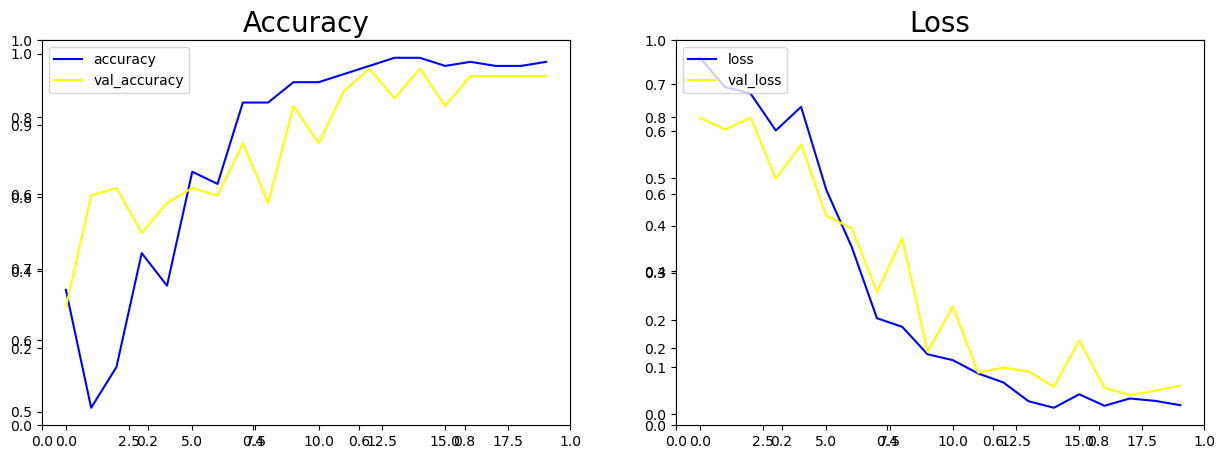

In [66]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax = fig.add_subplot(1,2,1)
ax.plot(hist.history['accuracy'], color='blue', label='accuracy')
ax.plot(hist.history['val_accuracy'], color='yellow', label='val_accuracy')
ax.set_title('Accuracy', fontsize=20)
ax.legend(loc="upper left")
ax = fig.add_subplot(1,2,2)
ax.plot(hist.history['loss'], color='blue', label='loss')
ax.plot(hist.history['val_loss'], color='yellow', label='val_loss')
ax.set_title('Loss', fontsize=20)
ax.legend(loc="upper left")
plt.show()

In [67]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

In [68]:
label1 = [1 for i in range(len(erode_with_RFI))] # 1 for artifact
label2 = [0 for i in range(len(erode_without_RFI))] # 0 for no artifact

images = [cv2.resize(image, (256,256)) for image in erode_with_RFI]

erode_w_RFI_dataset = tf.data.Dataset.from_tensor_slices((images, label1))

images2 = [cv2.resize(image, (256,256)) for image in erode_without_RFI]

erode_wout_RFI_dataset = tf.data.Dataset.from_tensor_slices((images2,label2))

In [69]:
tf_erode = erode_w_RFI_dataset.concatenate(erode_wout_RFI_dataset)

In [70]:
tf_erode = tf_erode.cache()
tf_erode = tf_erode.shuffle(165)
tf_erode = tf_erode.batch(16)
tf_erode = tf_erode.prefetch(64)

In [71]:
train = tf_erode.take(train_size)
val = tf_erode.skip(train_size).take(val_size)
test = tf_erode.skip(train_size+val_size).take(test_size)

In [72]:
tf_erode = tf_erode.map(lambda x,y: (x/255, y))

In [73]:
model = CNN()
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [74]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 554ms/step - accuracy: 0.5748 - loss: 29.5497 - val_accuracy: 0.7396 - val_loss: 1.4238
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - accuracy: 0.4432 - loss: 2.6018 - val_accuracy: 0.8229 - val_loss: 0.4505
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 486ms/step - accuracy: 0.6450 - loss: 0.6587 - val_accuracy: 0.8229 - val_loss: 0.5285
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 462ms/step - accuracy: 0.8614 - loss: 0.4215 - val_accuracy: 0.8438 - val_loss: 0.4343
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 558ms/step - accuracy: 0.9168 - loss: 0.3078 - val_accuracy: 0.9479 - val_loss: 0.2813
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 456ms/step - accuracy: 0.9700 - loss: 0.1762 - val_accuracy: 0.9271 - val_loss: 0.1918
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 455ms/step - accuracy: 0.9674 - loss: 0.0829 - val_accuracy: 0.9062 - val_loss: 0.1705
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 450ms/step - accuracy: 0.9856 - loss: 0.0495 - val_accuracy: 

In [75]:

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


In [76]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(0.8947368, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.974359, shape=(), dtype=float32)


In [77]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

In [78]:
label1 = [1 for i in range(len(dia_with_RFI))] # 1 for artifact
label2 = [0 for i in range(len(dia_without_RFI))] # 0 for no artifact

images = [cv2.resize(image, (256,256)) for image in dia_with_RFI]

dia_w_RFI_dataset = tf.data.Dataset.from_tensor_slices((images, label1))

images2 = [cv2.resize(image, (256,256)) for image in dia_without_RFI]

dia_wout_RFI_dataset = tf.data.Dataset.from_tensor_slices((images2,label2))

In [79]:
tf_dia = dia_w_RFI_dataset.concatenate(dia_wout_RFI_dataset)

In [80]:
tf_dia = tf_dia.cache()
tf_dia = tf_dia.shuffle(165)
tf_dia = tf_dia.batch(16)
tf_dia = tf_dia.prefetch(64)

In [81]:
tf_dia = tf_dia.map(lambda x,y: (x/255, y))

In [82]:
train = tf_dia.take(train_size)
val = tf_dia.skip(train_size).take(val_size)
test = tf_dia.skip(train_size+val_size).take(test_size)

In [83]:
model = CNN()
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [84]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 616ms/step - accuracy: 0.6925 - loss: 0.6879 - val_accuracy: 0.7604 - val_loss: 0.5990
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 588ms/step - accuracy: 0.4630 - loss: 0.7147 - val_accuracy: 0.7500 - val_loss: 0.6361
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 504ms/step - accuracy: 0.6091 - loss: 0.6486 - val_accuracy: 0.7812 - val_loss: 0.5363
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - accuracy: 0.7591 - loss: 0.5326 - val_accuracy: 0.7917 - val_loss: 0.3902
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 450ms/step - accuracy: 0.8026 - loss: 0.4141 - val_accuracy: 0.8333 - val_loss: 0.3613
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step - accuracy: 0.9106 - loss: 0.2220 - val_accuracy: 0.8438 - val_loss: 0.2666
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step - accuracy: 0.9811 - loss: 0.0920 - val_accuracy: 0.9271 - val_loss: 0.1750
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step - accuracy: 0.9817 - loss: 0.0765 - val_accuracy: 0

In [85]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


In [86]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(0.9032258, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.96153843, shape=(), dtype=float32)


In [87]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

In [88]:
label1 = [1 for i in range(len(bilateral_with_RFI))] # 1 for artifact
label2 = [0 for i in range(len(bilateral_without_RFI))] # 0 for no artifact

images = [cv2.resize(image, (256,256)) for image in bilateral_with_RFI]

bilateral_w_RFI_dataset = tf.data.Dataset.from_tensor_slices((images, label1))

images2 = [cv2.resize(image, (256,256)) for image in bilateral_without_RFI]

bilateral_wout_RFI_dataset = tf.data.Dataset.from_tensor_slices((images2,label2))

In [89]:
tf_bilateral = bilateral_w_RFI_dataset.concatenate(bilateral_wout_RFI_dataset)

In [90]:
tf_bilateral = tf_bilateral.cache()
tf_bilateral = tf_bilateral.shuffle(165)
tf_bilateral = tf_bilateral.batch(16)
tf_bilateral = tf_bilateral.prefetch(64)

In [91]:
tf_bilateral = tf_bilateral.map(lambda x,y: (x/255, y))

In [92]:
train = tf_bilateral.take(train_size)
val = tf_bilateral.skip(train_size).take(val_size)
test = tf_bilateral.skip(train_size+val_size).take(test_size)

In [93]:
model = CNN()
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [94]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 605ms/step - accuracy: 0.5152 - loss: 0.7073 - val_accuracy: 0.7500 - val_loss: 0.6698
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 680ms/step - accuracy: 0.7738 - loss: 0.6554 - val_accuracy: 0.9375 - val_loss: 0.6049
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 587ms/step - accuracy: 0.6504 - loss: 0.6095 - val_accuracy: 0.8333 - val_loss: 0.4887
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - accuracy: 0.7201 - loss: 0.5535 - val_accuracy: 0.8021 - val_loss: 0.4695
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 560ms/step - accuracy: 0.9328 - loss: 0.2735 - val_accuracy: 0.8854 - val_loss: 0.2251
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 556ms/step - accuracy: 0.9318 - loss: 0.1912 - val_accuracy: 0.9375 - val_loss: 0.1604
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 579ms/step - accuracy: 0.9658 - loss: 0.1439 - val_accuracy: 0.9271 - val_loss: 0.1809
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 576ms/step - accuracy: 0.9882 - loss: 0.0565 - val_accuracy: 0

In [95]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


In [96]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


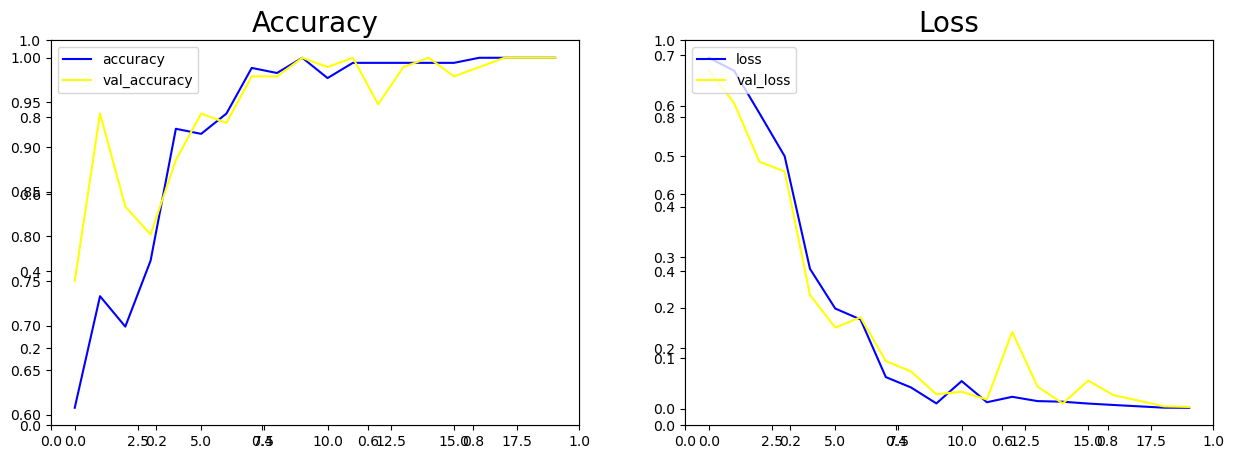

In [97]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax = fig.add_subplot(1,2,1)
ax.plot(hist.history['accuracy'], color='blue', label='accuracy')
ax.plot(hist.history['val_accuracy'], color='yellow', label='val_accuracy')
ax.set_title('Accuracy', fontsize=20)
ax.legend(loc="upper left")
ax = fig.add_subplot(1,2,2)
ax.plot(hist.history['loss'], color='blue', label='loss')
ax.plot(hist.history['val_loss'], color='yellow', label='val_loss')
ax.set_title('Loss', fontsize=20)
ax.legend(loc="upper left")
plt.show()

In [98]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

In [99]:
label1 = [1 for i in range(len(Canny_with_RFI))] # 1 for artifact
label2 = [0 for i in range(len(Canny_without_RFI))] # 0 for no artifact

images = [cv2.resize(image, (256,256)) for image in Canny_with_RFI]

canny_w_RFI_dataset = tf.data.Dataset.from_tensor_slices((images, label1))

images2 = [cv2.resize(image, (256,256)) for image in Canny_without_RFI]

canny_wout_RFI_dataset = tf.data.Dataset.from_tensor_slices((images2,label2))

In [100]:
tf_canny = canny_w_RFI_dataset.concatenate(canny_wout_RFI_dataset)

In [101]:
tf_canny = tf_canny.cache()
tf_canny = tf_canny.shuffle(165)
tf_canny = tf_canny.batch(16)
tf_canny = tf_canny.prefetch(64)

In [102]:
tf_canny = tf_canny.map(lambda x,y: (x/255, y))

In [103]:
train = tf_canny.take(train_size)
val = tf_canny.skip(train_size).take(val_size)
test = tf_canny.skip(train_size+val_size).take(test_size)

In [104]:
model = CNN()
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [105]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 574ms/step - accuracy: 0.7278 - loss: 0.6925 - val_accuracy: 0.6562 - val_loss: 0.6740
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 518ms/step - accuracy: 0.3504 - loss: 0.7030 - val_accuracy: 0.7708 - val_loss: 0.6688
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 659ms/step - accuracy: 0.7160 - loss: 0.6432 - val_accuracy: 0.6979 - val_loss: 0.5923
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 623ms/step - accuracy: 0.7063 - loss: 0.5622 - val_accuracy: 0.8021 - val_loss: 0.5039
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 582ms/step - accuracy: 0.7261 - loss: 0.4899 - val_accuracy: 0.8542 - val_loss: 0.3896
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 595ms/step - accuracy: 0.8661 - loss: 0.3727 - val_accuracy: 0.8646 - val_loss: 0.2701
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - accuracy: 0.8617 - loss: 0.3060 - val_accuracy: 0.8438 - val_loss: 0.2752
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step - accuracy: 0.8430 - loss: 0.3324 - val_accuracy: 0

In [106]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


In [107]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(0.875, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.96153843, shape=(), dtype=float32)
